# Homework 06 - Convolutional Neural Networks

In this homework you will implement a convolutional neural network to solve a object recognition task. The dataset you will work with is the CIFAR10 dataset, which contains small RGB images for ten different classes. 
 
To learn how you implement neural networks on your own I will only give minimal supervision, but you can get a lot of help from the last homework.

*Note:*  
As a guideline for this homework the solution of the last homework and the lecture sessions 5 and 6 can be used.

In [1]:
# Import the necessary packages.
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [ ]:
# Import the cifar10 dataset.
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()

### Investigate the dataset.

Q: *How many training/test images does this dataset have?*  
A: 50000 training images, 10000 test images

Q: *Which shape does one image have?*  
A: 32x32x3 (32 times 32 pixels, 3 channels/dimensions)

Q: *In which range are the pixel values?*  
A: 0 to 255 (RGB scale: red, green, blue)

In [3]:
### YOUR CODE HERE ###
print(train_images.shape) # Print the shape of the train images (number of images, rows, columns, dimensions/channels).
print(test_images.shape) # Print the shape of the test images (number of images, rows, columns, dimensions/channels).
print(np.min(train_images)) # Print the minimum value of the numpy array train images.
print(np.max(train_images)) # Print the maximum value of the numpy array train images.
#######################

(50000, 32, 32, 3)
(10000, 32, 32, 3)
0
255


#### Have a look at some images from the dataset.

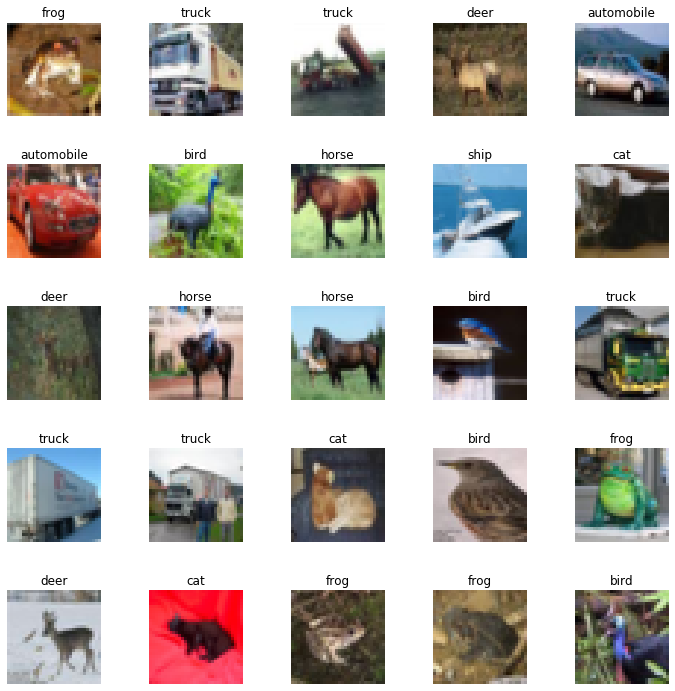

In [4]:
label_words = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

# We are plotting 5 subplots per row and column (25 in total), each with picture size 10x10.
fig, ax = plt.subplots(5,5,figsize=(10,10))
fig.tight_layout()
ax = ax.flatten()
for i in range(25):
    ### YOUR CODE HERE ###
    # Reading out an image.
    img = train_images[i]
    # We access the list label_words to output the name corresponding to the label number.
    lbl = label_words[int(train_labels[i])]
    ######################
    ax[i].imshow(img, cmap='gray')
    ax[i].set_title(lbl)
    ax[i].axis("off")

### Prepare the TensorFlow dataset.

In [ ]:
# We normalize our training and test images from values between 0 and 255 
# to values between 0 and 1 to apply our activation functions appropriately.
# That means we convert them to numpy arrays and back to tensors after the normalization.
train_images = np.array(train_images, dtype=np.float32)
test_images = np.array(test_images, dtype=np.float32)
train_images, test_images = train_images / 255.0, test_images / 255.0
train_dataset = tf.data.Dataset.from_tensor_slices((train_images, train_labels))
test_dataset = tf.data.Dataset.from_tensor_slices((test_images, test_labels))

#### YOUR CODE HERE ###
# Shuffling the training dataset.
train_dataset = train_dataset.shuffle(buffer_size=50000)
# Set the batch size to 32 for mini-batch.
train_dataset = train_dataset.batch(32)
# The test dataset can be processed full batch.
test_dataset = test_dataset.batch(10000)
#######################

### Build the model.

In [ ]:
from tensorflow.keras.layers import Layer

# You will implement a CNN. The layers you need are: 
# tf.keras.layers.Conv2D, tf.keras.layers.MaxPool2D, tf.keras.layers.Flatten, tf.keras.layers.Dense

# Convolutional layer: 32 kernels of size (3,3) with ReLU activation function (tf.keras.activations.relu).
# Note: In the first layer you have to provide the input shape to the function (argument: input_shape).
# Maxpooling layer: pooling size (2,2) and strides (2,2).
# Convolutional layer: 64 kernels of size (3,3) with ReLU activation function.
# Maxpooling layer: pooling size (2,2) and strides (2,2).
# Convolutional layer: 64 kernels of size (3,3) with ReLU activation function.
# Flatten the resulting ferature maps.
# Fully connected layer with 64 hidden neurons and ReLU activation function.
# Fully connected layer with 10 output neurons and softmax activation function (tf.keras.activations.softmax).

# Check the lecture session 6 if you need help applying these layers!

class Model(Layer):
    
    def __init__(self):
        super(Model, self).__init__()
        ### YOUR CODE HERE ###
        # Initialize all layers.
        self.conv_1 = tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation = "relu", input_shape = (32,32,3))
        self.maxpool_1 = tf.keras.layers.MaxPool2D(pool_size = (2,2), strides = (2,2))
        self.conv_2 = tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation = "relu")
        self.maxpool_2 = tf.keras.layers.MaxPool2D(pool_size = (2,2), strides = (2,2))
        self.conv_3 = tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation = "relu")
        self.flatten = tf.keras.layers.Flatten()
        self.dense_layer = tf.keras.layers.Dense(units = 64, activation = "relu")
        self.output_layer = tf.keras.layers.Dense(units = 10, activation = "softmax")
        ########################
        
    def call(self, x):
        ### YOUR CODE HERE ###
        # Define the forward pass: 
        # Our input runs through every layer; the last layer produces the output of the forward step.
        x = self.conv_1(x)
        x = self.maxpool_1(x)
        x = self.conv_2(x)
        x = self.maxpool_2(x)
        x = self.conv_3(x)
        x = self.flatten(x)
        x = self.dense_layer(x)
        x = self.output_layer(x)

        return x
        ######################

### Train the model.

In [ ]:
tf.keras.backend.clear_session()

### YOUR CODE HERE ###
# Initialize model, loss (categorical cross entropy) and optimizer (Adam with default params).
# Check the last homework or the tf.keras documentation if you need help!
model = Model()
cce = tf.keras.losses.CategoricalCrossentropy()
adam = tf.keras.optimizers.Adam()
######################

# Initialize lists for later visualization.
train_steps = []
train_losses = []
train_accuracies = []
test_steps = []
test_losses = []
test_accuracies = []
step = 0


for epoch in range(3):
    
    # We iterate through the tuples (input, target) of our training dataset.
    for (x,t) in train_dataset:
        t = tf.reshape(t, shape=[-1])
        ### YOUR CODE HERE ###
        # Turn the labels into one-hot vectors (-> session 5).
        t = tf.one_hot(t, 10)
        # Perform a training step (check tf.GradientTape()).
        # For that, calculate the output, loss and gradients.
        with tf.GradientTape() as tape:
          output = model(x)
          loss = cce(t, output)
          gradients = tape.gradient(loss, model.trainable_variables)

        # Apply the gradients according to our optimizer.
        adam.apply_gradients(zip(gradients, model.trainable_variables))

        # Calculate the training accuracy every 25 steps and append the lists.
        if step % 25 == 0:
          accuracy = np.sum(np.argmax(t, axis=1) == np.argmax(output, axis=1)) / t.shape[0]
          train_accuracies.append(accuracy)
          train_losses.append(loss)
          train_steps.append(step)
          
        # Calculate the test loss and accuracy every 50 steps.
        # Reminder: Reshape the labels and turn them into one-hot again.
        if step % 50 == 0:
          for (x,t) in test_dataset:
            
            t = tf.reshape(t, shape=[-1])
            t = tf.one_hot(t, 10)

            output = model(x)
            loss = cce(t, output)
            accuracy = np.sum(np.argmax(t, axis=1) == np.argmax(output, axis=1)) / t.shape[0]
            test_losses.append(loss)
            test_accuracies.append(accuracy)
            test_steps.append(step)
        ########################
        
        step += 1

### Visualize the training progress.

Your model should achieve around 60-70% test accuracy.

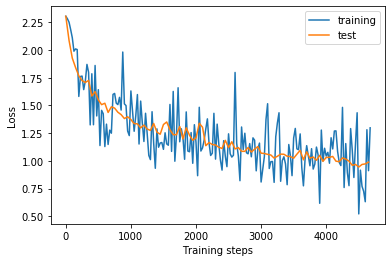

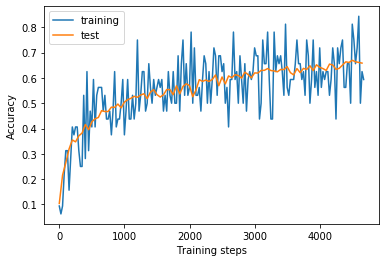

In [8]:
# Visualize accuracy and loss for training and test data. 
# One plot training and test loss.
# One plot training and test accuracy.
# Add a legend to show more clearly which line indicates which dataset.
### YOUR CODE HERE ###
plt.figure()
line1, = plt.plot(train_steps, train_losses)
line2, = plt.plot(test_steps, test_losses)
plt.xlabel("Training steps")
plt.ylabel("Loss")
plt.legend((line1,line2),("training","test"))
plt.show()

plt.figure()
line1, = plt.plot(train_steps, train_accuracies)
line2, = plt.plot(test_steps, test_accuracies)
plt.xlabel("Training steps")
plt.ylabel("Accuracy")
plt.legend((line1,line2),("training","test"))
plt.show()
######################